

# Project: Investigate a Movie Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> For Data Analysis, we have selected a database that contains information about movies.This database has details about the list of movies with the time and date they have released, Also name of the director,productuon company and the cast details.It also has the budget and revenue details for most of the movies.
> Our Approach will start with Data Wrangling and cleaning where we will load the data and start cleaning the database to make the data more approprate for data analysing.Then we will perform data anaysis on the cleaned data and communicate the results through visualization
> Below are the different factors are considered for this Analysis

1. Number of Movies released on each genre for the past 5 years 
2. Analyze the budget,revenue,popularity and vote average based on the genres
3. Find the co-relation between budget and revenue, Does it have postive or negative or zero correlation ?
4. List of successful producion companies ?
5. Does runtime of the movie affects popularity?

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling:


In [52]:
# Load our data and print out a few lines
df = pd.read_csv('tmdb-movies.csv')

#Read the data
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08




### Data Cleaning:

In [3]:
#change the datatype of genre from float to string
df['genres'] = df['genres'].astype(str)

In [4]:
#Considering only the first genre as the genre of the film
df['genres'] = df['genres'].apply(lambda x: x.split("|")[0])

In [5]:
#dropping the rows which has no genre listed.
df.drop(df.query('genres == "nan"').index,axis=0,inplace=True)

In [6]:
#confirm changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 21 columns):
id                      10843 non-null int64
imdb_id                 10835 non-null object
popularity              10843 non-null float64
budget                  10843 non-null int64
revenue                 10843 non-null int64
original_title          10843 non-null object
cast                    10768 non-null object
homepage                2931 non-null object
director                10801 non-null object
tagline                 8037 non-null object
keywords                9368 non-null object
overview                10840 non-null object
runtime                 10843 non-null int64
genres                  10843 non-null object
production_companies    9827 non-null object
release_date            10843 non-null object
vote_count              10843 non-null int64
vote_average            10843 non-null float64
release_year            10843 non-null int64
budget_adj              1

In [7]:
#dropping few unwanted columns
df.drop(['tagline','imdb_id','homepage','keywords','overview','director','production_companies'],axis=1,inplace=True)


In [8]:
#confirm changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 14 columns):
id                10843 non-null int64
popularity        10843 non-null float64
budget            10843 non-null int64
revenue           10843 non-null int64
original_title    10843 non-null object
cast              10768 non-null object
runtime           10843 non-null int64
genres            10843 non-null object
release_date      10843 non-null object
vote_count        10843 non-null int64
vote_average      10843 non-null float64
release_year      10843 non-null int64
budget_adj        10843 non-null float64
revenue_adj       10843 non-null float64
dtypes: float64(4), int64(6), object(4)
memory usage: 1.2+ MB


<a id='eda'></a>
## Exploratory Data Analysis



### 1. Number of Movies released on each genre for the past 5 years

Text(0,0.5,'No.of Movies')

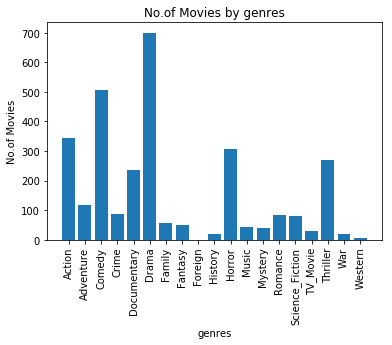

In [9]:
#1 Number of Movies released on each genre for the past 5 years

df_5 = df[df['release_year'] > 2010]
gen_ct = df_5.groupby(['genres'])['id'].count()


Action = gen_ct['Action']
Adventure = gen_ct['Adventure']
Animation = gen_ct['Animation']
Comedy = gen_ct['Comedy']
Crime = gen_ct['Crime']
Documentary = gen_ct['Documentary']
Drama = gen_ct['Drama']
Family = gen_ct['Family']
Fantasy = gen_ct['Fantasy']
Foreign = gen_ct['Foreign']
History = gen_ct['History']
Horror = gen_ct['Horror']
Music = gen_ct['Music']
Mystery = gen_ct['Mystery']
Romance = gen_ct['Romance']
Science_Fiction = gen_ct['Science Fiction']
TV_Movie = gen_ct['TV Movie']
Thriller = gen_ct['Thriller']
War = gen_ct['War']
Western = gen_ct['Western']

#Visualization

N=19
locations = np.arange(N)
gens = [Action,Adventure,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science_Fiction,TV_Movie,Thriller,War,Western]
labels = ['Action','Adventure','Comedy','Crime','Documentary','Drama','Family','Fantasy','Foreign','History','Horror','Music','Mystery','Romance','Science_Fiction','TV_Movie','Thriller','War','Western']
plt.bar(locations,gens,tick_label=labels),
plt.xticks(locations,rotation=90)
plt.title('No.of Movies by genres')
plt.xlabel('genres')
plt.ylabel('No.of Movies')


#COMMUNICATION - In the Last 5 years, Drama genre tops the list with more number of movies followed by comedy genre.

In [32]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10843.000000,10843.000000,1.084300e+04,1.084300e+04,10843.000000,10843.000000,10843.000000,10843.000000,1.084300e+04,1.084300e+04
mean,65868.491930,0.647456,1.465672e+07,3.990779e+07,102.137508,217.813705,5.973974,2001.315595,1.758827e+07,5.147332e+07
std,91977.394803,1.000986,3.093864e+07,1.171131e+08,31.293320,576.155351,0.934260,12.813298,3.433299e+07,1.447664e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10589.500000,0.208253,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20558.000000,0.384555,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75182.000000,0.715349,1.500000e+07,2.413675e+07,111.000000,146.000000,6.600000,2011.000000,2.093530e+07,3.387655e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### 2. Genre vs Revenue_adj
### 3. Genre vs Budjet_adj
### 4. Genre vs Popularity
### 5. Genre vs Vote_Avg
### 6. Co-relation between Budjet_adj and Revenue_adj

Text(0,0.5,'Revenue_adj')

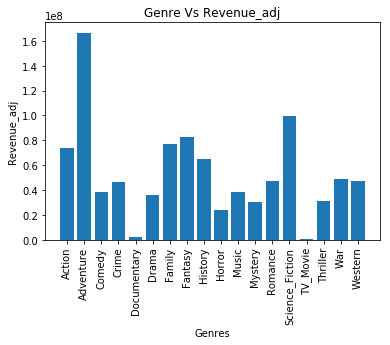

In [27]:
#2 - Genre Vs Revenue_adj

df_r = df.groupby(['genres'])['revenue_adj'].mean()

Action = df_r['Action'].round()
Adventure = df_r['Adventure'].round()
Animation = df_r['Animation'].round()
Comedy = df_r['Comedy'].round()
Crime = df_r['Crime'].round()
Documentary = df_r['Documentary'].round()
Drama = df_r['Drama'].round()
Family = df_r['Family'].round()
Fantasy = df_r['Fantasy'].round()
#Foreign = df_r['Foreign'].round()
History = df_r['History'].round()
Horror = df_r['Horror'].round()
Music = df_r['Music'].round()
Mystery = df_r['Mystery'].round()
Romance = df_r['Romance'].round()
Science_Fiction = df_r['Science Fiction'].round()
TV_Movie = df_r['TV Movie'].round()
Thriller = df_r['Thriller'].round()
War = df_r['War'].round()
Western = df_r['Western'].round()

#Visualization

N=18
locations = np.arange(N)
gens = [Action,Adventure,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science_Fiction,TV_Movie,Thriller,War,Western]
labels = ['Action','Adventure','Comedy','Crime','Documentary','Drama','Family','Fantasy','History','Horror','Music','Mystery','Romance','Science_Fiction','TV_Movie','Thriller','War','Western']
plt.bar(locations,gens,tick_label=labels),
plt.xticks(locations,rotation=90)
plt.title('Genre Vs Revenue_adj')
plt.xlabel('Genres')
plt.ylabel('Revenue_adj')


# COMMUNICATION - Adventure movies produced more revenue when compared to all other genres, Also science_fiction movies
# as well produced good amount of revenue.



Text(0,0.5,'Budget_adj')

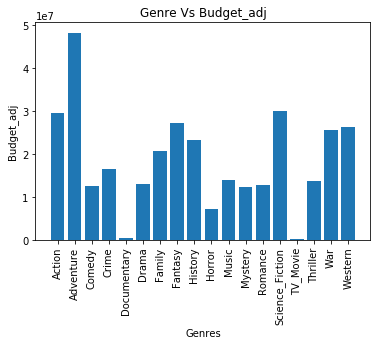

In [28]:
#3 - Genre Vs Budjet_adj

df_b = df.groupby(['genres'])['budget_adj'].mean() 

Action = df_b['Action'].round()
Adventure = df_b['Adventure'].round()
Animation = df_b['Animation'].round()
Comedy = df_b['Comedy'].round()
Crime = df_b['Crime'].round()
Documentary = df_b['Documentary'].round()
Drama = df_b['Drama'].round()
Family = df_b['Family'].round()
Fantasy = df_b['Fantasy'].round()
#Foreign = df_b['Foreign'].round()
History = df_b['History'].round()
Horror = df_b['Horror'].round()
Music = df_b['Music'].round()
Mystery = df_b['Mystery'].round()
Romance = df_b['Romance'].round()
Science_Fiction = df_b['Science Fiction'].round()
TV_Movie = df_b['TV Movie'].round()
Thriller = df_b['Thriller'].round()
War = df_b['War'].round()
Western = df_b['Western'].round()

#Visualization

N=18
locations = np.arange(N)
gens = [Action,Adventure,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science_Fiction,TV_Movie,Thriller,War,Western]
labels = ['Action','Adventure','Comedy','Crime','Documentary','Drama','Family','Fantasy','History','Horror','Music','Mystery','Romance','Science_Fiction','TV_Movie','Thriller','War','Western']
plt.bar(locations,gens,tick_label=labels),
plt.xticks(locations,rotation=90)
plt.title('Genre Vs Budget_adj')
plt.xlabel('Genres')
plt.ylabel('Budget_adj')


# COMMUNICATION - Adventure genre movies are made with huge budget than any other genres 
# also they are producing more revenue. Suprisingly Action movies are made with more budjet but producing less revenue.

Text(0,0.5,'Popularity')

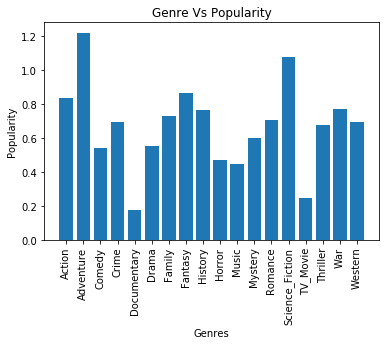

In [30]:
#4 - Genre Vs Popularity

df_p = df.groupby(['genres'])['popularity'].mean() 

Action = df_p['Action']
Adventure = df_p['Adventure']
Animation = df_p['Animation']
Comedy = df_p['Comedy']
Crime = df_p['Crime']
Documentary = df_p['Documentary']
Drama = df_p['Drama']
Family = df_p['Family']
Fantasy = df_p['Fantasy']
#Foreign = df_b['Foreign'].round()
History = df_p['History']
Horror = df_p['Horror']
Music = df_p['Music']
Mystery = df_p['Mystery']
Romance = df_p['Romance']
Science_Fiction = df_p['Science Fiction']
TV_Movie = df_p['TV Movie']
Thriller = df_p['Thriller']
War = df_p['War']
Western = df_p['Western']

#Visualization

N=18
locations = np.arange(N)
gens = [Action,Adventure,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science_Fiction,TV_Movie,Thriller,War,Western]
labels = ['Action','Adventure','Comedy','Crime','Documentary','Drama','Family','Fantasy','History','Horror','Music','Mystery','Romance','Science_Fiction','TV_Movie','Thriller','War','Western']
plt.bar(locations,gens,tick_label=labels),
plt.xticks(locations,rotation=90)
plt.title('Genre Vs Popularity')
plt.xlabel('Genres')
plt.ylabel('Popularity')


#Communication - Adventure and Science Fiction are more popular among the people and Documentry gets least poplularity.

Text(0,0.5,'vote_average')

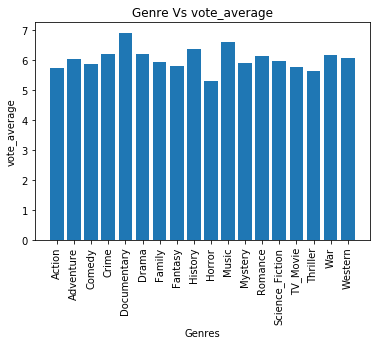

In [49]:
#5 Genre vs Vote_Avg

df_v = df.groupby(['genres'])['vote_average'].mean() 


Action = df_v['Action']
Adventure = df_v['Adventure']
Animation = df_v['Animation']
Comedy = df_v['Comedy']
Crime = df_v['Crime']
Documentary = df_v['Documentary']
Drama = df_v['Drama']
Family = df_v['Family']
Fantasy = df_v['Fantasy']
#Foreign = df_b['Foreign'].round()
History = df_v['History']
Horror = df_v['Horror']
Music = df_v['Music']
Mystery = df_v['Mystery']
Romance = df_v['Romance']
Science_Fiction = df_v['Science Fiction']
TV_Movie = df_v['TV Movie']
Thriller = df_v['Thriller']
War = df_v['War']
Western = df_v['Western']

#Visualization

N=18
locations = np.arange(N)
gens = [Action,Adventure,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science_Fiction,TV_Movie,Thriller,War,Western]
labels = ['Action','Adventure','Comedy','Crime','Documentary','Drama','Family','Fantasy','History','Horror','Music','Mystery','Romance','Science_Fiction','TV_Movie','Thriller','War','Western']
plt.bar(locations,gens,tick_label=labels),
plt.xticks(locations,rotation=90)
plt.title('Genre Vs vote_average')
plt.xlabel('Genres')
plt.ylabel('vote_average')

#Communication: Documentry tops the list with highest voting Average than any other genres.


Text(0,0.5,'Budget_adj')

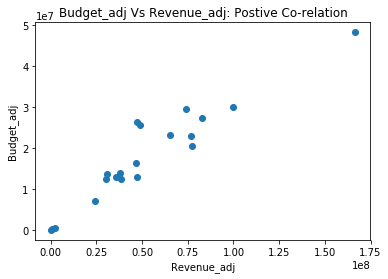

In [50]:
#6 Budjet_adj vs Revenue_adj

df_r = df.groupby(['genres'])['revenue_adj'].mean()
df_b = df.groupby(['genres'])['budget_adj'].mean()



plt.scatter(df_r,df_b)
plt.title('Budget_adj Vs Revenue_adj')
plt.xlabel('Revenue_adj')
plt.ylabel('Budget_adj')


#Communication: Budget and Revenue shows a good postive co-relation.

In [ ]:
#Conclusions:
 # Able to analyze the movie dataset by considering genre as a main factor.
 # Able to predict which could be possibly be the genre that people like or dislike most     
 # Able to predict the relation between budget and revenue factors
 # we can further investigate this dataset by taking other factors like production companies,cast list,runtime etc.

    

In [53]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0